<a href="https://colab.research.google.com/github/MartinPSE/StandAloneDL/blob/master/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Types of Task Dealing with Sequentail Data
---
  1. one to one
  2. one to many
  3. many to one
  4. many to many
  5. many to many

### one to many
---
  Automatically generate caption with the given image

### many to one
---
  Predict whether a company would be bankrupted

### many to many
---
  Translate one sentence into another language

### many to many
---
  Classify whether the word is own's name or not


## Deep Learning Dealing with Sequential Data
---
  MLP ? Stack of fully connected layers <br>
    <font color='pink'> Cannot handle a sequence with arbitrary length <br> For fixed length sequence, require lots of parameters</font><br>
  CNN ? Stack of ( convolution + pooling + fully connected) layers <br>
  <font color='pink'>Actually perform quite well on time series analysis</font>

## RNN ( Recurrent Neural Network)
---
  Process both new inputs and model output of previous input!

  How can we combine new input and previous input?

## Practice
---

### Generating Dataset

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# ===== Generating Dataset =====
num_data = 2400
t = np.linspace(0.0, 100.0,num_data)
y = np.sin(t) + np.sin(2*t) # + np.sin(0.4*t)
e = np.random.normal(0, 0.1, num_data)
y = y + e

seq_len = 10
X = []
y_true = []
for i in range(len(t)-seq_len):
  X.append(y[i:i+seq_len])
  y_true.append(y[i+seq_len])

X = np.array(X)
y_true = np.array(y_true)

X = X.reshape(10,2390,1)
# 10 , 2390, 1 
# seq_len, batch_size, input_dim 순서로 input 값을 받는다.

### Model Architecuture
---

In [2]:
import torch
import torch.nn as nn

class RNN(nn.Module):
  def __init__(self, input_dim, output_dim, hid_dim, batch_size):
    super(RNN, self).__init__()
    # 변수 선언 
    self.input_dim = input_dim
    self.output_dim = output_dim
    self.hid_dim = hid_dim
    self.batch_size = batch_size

    # Model Define
    self.u = nn.Linear(self.input_dim, self.hid_dim, bias=False)
    self.w = nn.Linear(self.hid_dim, self.hid_dim, bias=False)
    self.v = nn.Linear(self.hid_dim, self.output_dim, bias=False)
    self.act = nn.Tanh()

    # batch_size 갯수만큼 초기화
    self.hidden = self.init_hidden()

  def init_hidden(self, batch_size= None):
    if batch_size is None:
      batch_size = self.batch_size
    return torch.zeros(batch_size, self.hid_dim) # (1 x hid_dim) 차원 0 vector 생성

  def forward(self, x):
    h = self.act(self.u(x) + self.w(self.hidden)) # 자동으로 Element Sum
    y = self.v(h)
    self.hidden = h

    return y, h


In [4]:
import torch.optim as optim

model = RNN(1, 1, 50, 2390)

optimizer = optim.SGD(model.parameters(), lr = 0.005)
criterion = nn.MSELoss()
epoch  = 100

# ===== Train ===== #
# with torch.no_grad():

for i in range(epoch):
  model.train()
  model.zero_grad()
  optimizer.zero_grad()
  model.hidden = model.init_hidden() #hidden_layer 또한 초기화를 해줘야한다.
  

  for x in X:
    x = torch.Tensor(x).float()
    y_true = torch.Tensor(y_true).float()

    y_pred, hidden = model(x)
    model.hidden = hidden

  loss = criterion(y_pred.view(-1), y_true.view(-1))
  loss.backward()
  optimizer.step()
print(round(loss.item(),4))



1.0138


In [5]:
# ===== Evaluation ===== #
X = X[:, 0, :]
test_X = X.reshape(10, 1,1)
print(test_X.shape)

(10, 1, 1)


tensor([[-0.0161]])
tensor([[0.4178]])
tensor([[1.6320]])
tensor([[-1.0092]])
tensor([[-0.2287]])
tensor([[-1.1143]])
tensor([[0.1154]])
tensor([[1.6405]])
tensor([[-0.4101]])
tensor([[1.0057]])


(0.0, 20.0)

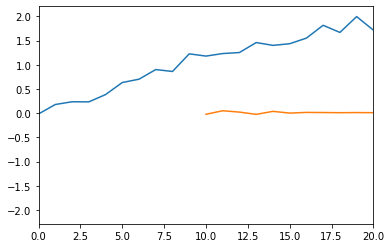

In [9]:
model.eval()

list_y_pred = []

with torch.no_grad():
  model.hidden = model.init_hidden(batch_size=1) # 요기서 맞춰주자!

  for x in test_X:
    x = torch.Tensor(x).float()
    print(x)
    y_pred, hidden = model(x)
    model.hidden = hidden

  for i in range(2390):

    y_pred2, hidden = model(y_pred)
    list_y_pred.append(y_pred2.view(-1).item())

plt.plot(y)
plt.plot(list(range(10,2400)),list_y_pred)
plt.xlim(0,20)

In [8]:
len(list_y_pred)

2389